<a href="https://colab.research.google.com/github/WhiteTeaDragon/SingularValues/blob/main/PerformanceExperimentsTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import functions
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [88]:
importlib.reload(functions)

<module 'functions' from '/content/functions.py'>

Время на обучение у разных моделей может отличаться -- это происходит из-за того, что они обучались в разных сессиях Google Colab.

### Loading Data

In [2]:
num_classes = 10

# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions.
input_shape = x_train.shape[1:]

# normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# if subtract pixel mean is enabled
x_train_mean = np.mean(x_train, axis=0)
x_train -= x_train_mean
x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# convert class vectors to binary class matrices.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


### decomposition_rank = 1

#### Model without clipping

In [92]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=1)
model.summary()

Learning rate:  0.001
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d_759 (ConvDeco (None, 32, 32, 16)   44          input_24[0][0]                   
__________________________________________________________________________________________________
batch_normalization_713 (BatchN (None, 32, 32, 16)   64          conv_decomposed2d_759[0][0]      
__________________________________________________________________________________________________
activation_713 (Activation)     (None, 32, 32, 16)   0           batch_normalization_713[0][0]    
_____________________________________________________________________

In [83]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict', steps_per_epoch=100, batch_size=100, epochs=260)

Using real-time data augmentation.
Epoch 1/260
Learning rate:  0.001
100/100 [==============================] - 18s 119ms/step - loss: 4.5055 - acc: 0.1079 - val_loss: 2.6382 - val_acc: 0.0998

Epoch 00001: val_acc improved from -inf to 0.09980, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/260
Learning rate:  0.001
100/100 [==============================] - 10s 98ms/step - loss: 2.4892 - acc: 0.1420 - val_loss: 2.7637 - val_acc: 0.0997

Epoch 00002: val_acc did not improve from 0.09980
Epoch 3/260
Learning rate:  0.001
100/100 [==============================] - 10s 96ms/step - loss: 2.4116 - acc: 0.1715 - val_loss: 2.6878 - val_acc: 0.1100

Epoch 00003: val_acc improved from 0.09980 to 0.11000, saving model to /content/saved_models/cifar10_ResNet32v1_model.003.h5
Epoch 4/260
Learning rate:  0.001
100/100 [==============================] - 9s 95ms/step - loss: 2.3557 - acc: 0.1691 - val_loss: 2.6786 - val_acc: 0.1099

Epoch 00004: val_acc did not improve

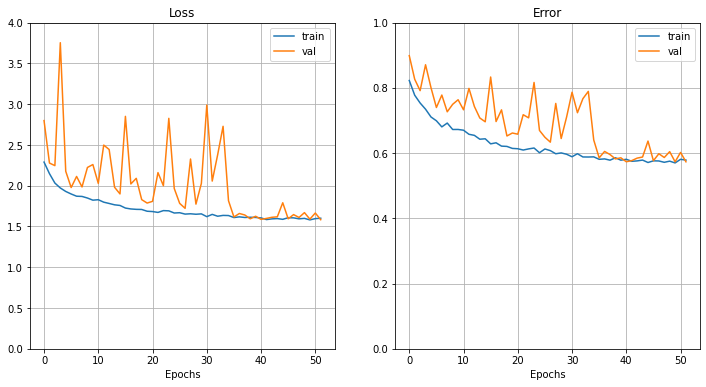

In [110]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [111]:
1 - history['val_acc'][-1]

0.5733000040054321

#### Model with clipping to 0.5

In [96]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=1)

Learning rate:  0.001


In [97]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_05', steps_per_epoch=100, epochs=260,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/260
Learning rate:  0.001
100/100 [==============================] - 18s 119ms/step - loss: 2.9012 - acc: 0.1181 - val_loss: 2.6787 - val_acc: 0.0990

Epoch 00001: val_acc improved from -inf to 0.09900, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/260
Learning rate:  0.001
100/100 [==============================] - 10s 96ms/step - loss: 2.2181 - acc: 0.1542 - val_loss: 2.3531 - val_acc: 0.1000

Epoch 00002: val_acc improved from 0.09900 to 0.10000, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/260
Learning rate:  0.001
100/100 [==============================] - 9s 95ms/step - loss: 2.1089 - acc: 0.1820 - val_loss: 2.3630 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.10000
Epoch 4/260
Learning rate:  0.001
100/100 [==============================] - 9s 95ms/step - loss: 2.0802 - acc: 0.1886 - val_loss: 2.3665 - val_acc: 0.1000

Epoch 00004: val_acc did not improve 

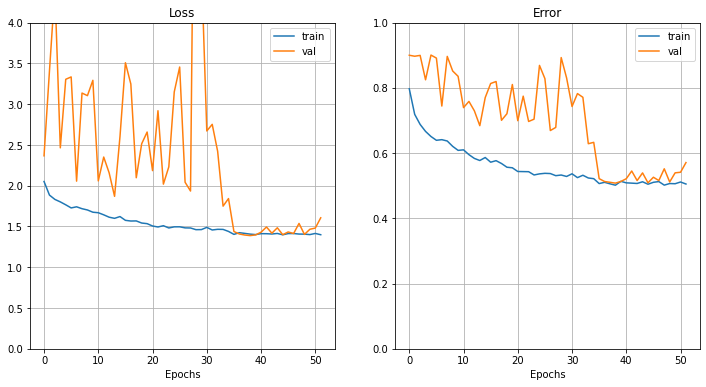

In [108]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [109]:
1 - history['val_acc'][-1]

0.5708999931812286

#### Model with clipping to 1

In [112]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=1)
model.summary()

Learning rate:  0.001
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_27 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d_858 (ConvDeco (None, 32, 32, 16)   44          input_27[0][0]                   
__________________________________________________________________________________________________
batch_normalization_806 (BatchN (None, 32, 32, 16)   64          conv_decomposed2d_858[0][0]      
__________________________________________________________________________________________________
activation_806 (Activation)     (None, 32, 32, 16)   0           batch_normalization_806[0][0]    
_____________________________________________________________________

In [113]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(1)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'trainHistoryDict_clip_1', steps_per_epoch=100, epochs=260,
                       batch_size=100,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/260
Learning rate:  0.001
100/100 [==============================] - 19s 111ms/step - loss: 6.3806 - acc: 0.0947 - val_loss: 3.9389 - val_acc: 0.0732

Epoch 00001: val_acc improved from -inf to 0.07320, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/260
Learning rate:  0.001
100/100 [==============================] - 10s 97ms/step - loss: 2.3090 - acc: 0.1276 - val_loss: 2.3700 - val_acc: 0.1000

Epoch 00002: val_acc improved from 0.07320 to 0.10000, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/260
Learning rate:  0.001
100/100 [==============================] - 10s 97ms/step - loss: 2.2492 - acc: 0.1494 - val_loss: 2.3701 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.10000
Epoch 4/260
Learning rate:  0.001
100/100 [==============================] - 10s 96ms/step - loss: 2.2063 - acc: 0.1699 - val_loss: 2.3974 - val_acc: 0.1000

Epoch 00004: val_acc did not improv

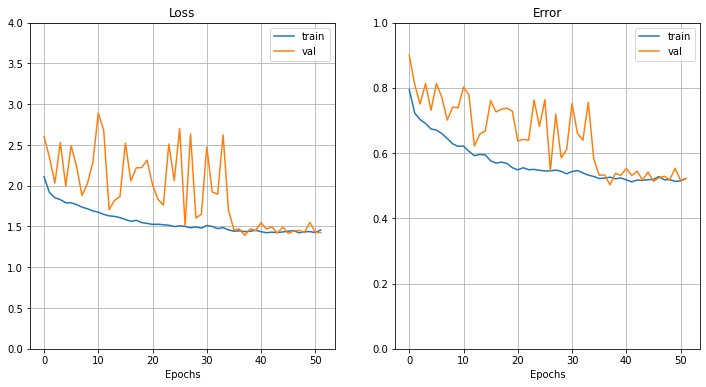

In [114]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('trainHistoryDict_clip_1', "rb"))
functions.plot_loss_acc(history, 4, 1)

In [115]:
1 - history['val_acc'][-1]

0.5221000015735626

#### Plotting final graph

In [116]:
def plot_final_graph(addition=""):
    history_no_clipping = pickle.load(open(addition + 'trainHistoryDict', "rb"))
    history_05 = pickle.load(open(addition + 'trainHistoryDict_clip_05', "rb"))
    history_1 = pickle.load(open(addition + 'trainHistoryDict_clip_1', "rb"))
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    axs[0].grid(True)
    axs[1].grid(True)
    max_len = len(history_no_clipping['val_loss'])
    axs[0].plot(history_no_clipping['val_loss'][4:max_len:5], label='no clipping')
    axs[0].plot(history_05['val_loss'][4:max_len:5], label='0.5')
    axs[0].plot(history_1['val_loss'][4:max_len:5], label='1')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylim(0, 4)
    axs[1].plot(1 - np.array(history_no_clipping['val_acc'][4:max_len:5]), label='no clipping')
    axs[1].plot(1 - np.array(history_05['val_acc'][4:max_len:5]), label='0.5')
    axs[1].plot(1 - np.array(history_1['val_acc'][4:max_len:5]), label='1')
    axs[1].set_title('Error')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylim(0, 1)
    axs[0].legend(loc='best')
    axs[1].legend(loc='best')

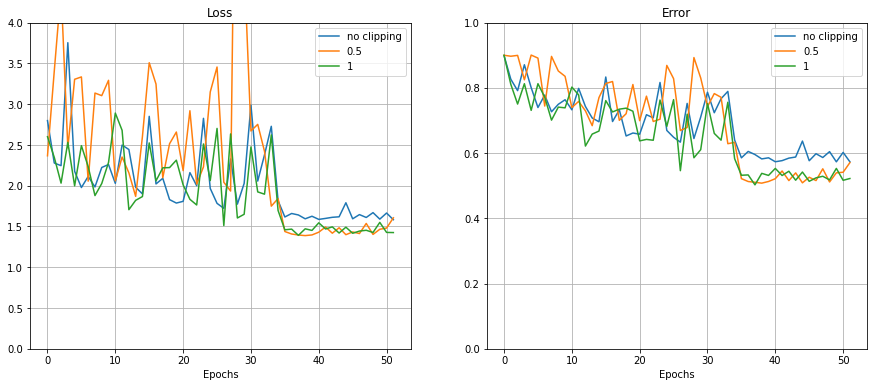

In [117]:
plot_final_graph()

### decomposition_rank = 10

#### Model without clipping

In [3]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=10)
model.summary()

Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d (ConvDecompos (None, 32, 32, 16)   1106        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv_decomposed2d[0][0]          
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
________________________________________________________________________

In [4]:
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'R_10_trainHistoryDict', steps_per_epoch=100, epochs=150)

Using real-time data augmentation.
Epoch 1/150
Learning rate:  0.001
100/100 [==============================] - 49s 127ms/step - loss: 4.5087 - acc: 0.1787 - val_loss: 4.3944 - val_acc: 0.1554

Epoch 00001: val_acc improved from -inf to 0.15540, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/150
Learning rate:  0.001
100/100 [==============================] - 11s 108ms/step - loss: 2.1399 - acc: 0.3317 - val_loss: 2.2435 - val_acc: 0.3304

Epoch 00002: val_acc improved from 0.15540 to 0.33040, saving model to /content/saved_models/cifar10_ResNet32v1_model.002.h5
Epoch 3/150
Learning rate:  0.001
100/100 [==============================] - 11s 108ms/step - loss: 2.0400 - acc: 0.3849 - val_loss: 2.4334 - val_acc: 0.3100

Epoch 00003: val_acc did not improve from 0.33040
Epoch 4/150
Learning rate:  0.001
100/100 [==============================] - 11s 107ms/step - loss: 1.9345 - acc: 0.4161 - val_loss: 2.0812 - val_acc: 0.3554

Epoch 00004: val_acc improved fr

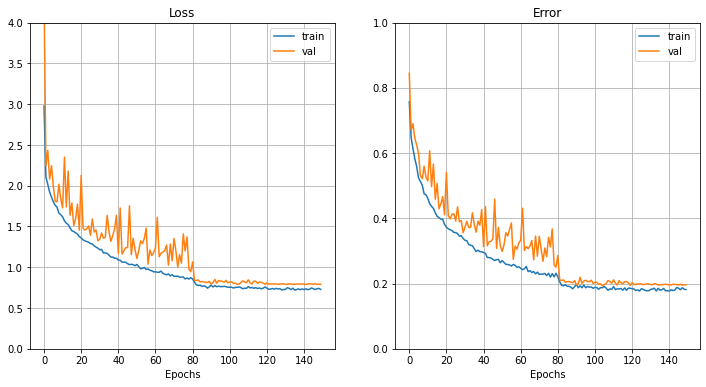

In [5]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('R_10_trainHistoryDict', "rb"))
functions.plot_loss_acc(history, 4, 1, 150)

In [6]:
1 - history['val_acc'][-1]

0.19609999656677246

#### Model with clipping to 0.5

In [14]:
model, model_type = functions.define_and_compile_ResNet_model(
    input_shape, conv_layer = functions.ConvDecomposed2D, decomposition_rank=10)
model.summary()

Learning rate:  0.001
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_decomposed2d_66 (ConvDecom (None, 32, 32, 16)   1106        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_62 (BatchNo (None, 32, 32, 16)   64          conv_decomposed2d_66[0][0]       
__________________________________________________________________________________________________
activation_62 (Activation)      (None, 32, 32, 16)   0           batch_normalization_62[0][0]     
______________________________________________________________________

In [15]:
callbacks = functions.standard_callbacks(model_type) + [functions.Clipping(0.5)]
history = functions.run_training(model, model_type, x_train, y_train, x_test, y_test,
                       'R_10_trainHistoryDict_clip_05', steps_per_epoch=100, epochs=150,
                       callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/150
Learning rate:  0.001
100/100 [==============================] - 19s 125ms/step - loss: 6.0591 - acc: 0.1605 - val_loss: 8.9885 - val_acc: 0.1152

Epoch 00001: val_acc improved from -inf to 0.11520, saving model to /content/saved_models/cifar10_ResNet32v1_model.001.h5
Epoch 2/150
Learning rate:  0.001
100/100 [==============================] - 11s 109ms/step - loss: 2.1153 - acc: 0.2245 - val_loss: 2.3969 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.11520
Epoch 3/150
Learning rate:  0.001
100/100 [==============================] - 11s 109ms/step - loss: 1.7611 - acc: 0.3489 - val_loss: 2.4027 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.11520
Epoch 4/150
Learning rate:  0.001
100/100 [==============================] - 11s 107ms/step - loss: 1.6382 - acc: 0.4113 - val_loss: 2.4945 - val_acc: 0.1000

Epoch 00004: val_acc did not improve from 0.11520
Epoch 5/150
Learning rate:  0.001
100/100 [==============

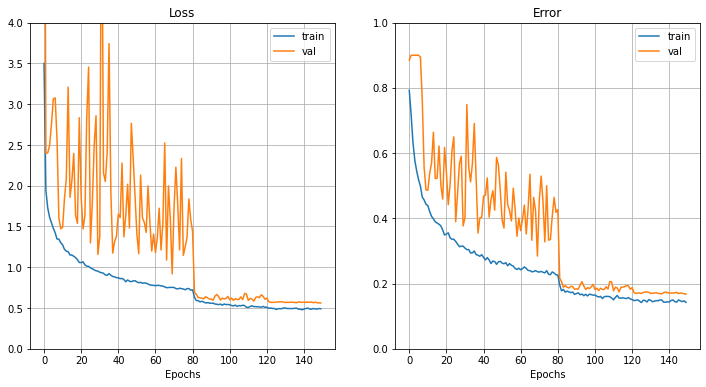

In [16]:
import pickle
from matplotlib import pyplot as plt

history = pickle.load(open('R_10_trainHistoryDict_clip_05', "rb"))
functions.plot_loss_acc(history, 4, 1, 150)

In [ ]:
1 - history['val_acc'][-1]